# File and libraries

In [1]:
import pandas as pd
import numpy as np


filepath=r'dataset/df_msg_bal_input'
test_filepath= f"{filepath}_test.csv"
train_filepath= f"{filepath}_train.csv"

sample_filepath=f"{filepath}_sample.csv"
test_sample_filepath=f"{filepath}_test_sample.csv"
train_sample_filepath=f"{filepath}_train_sample.csv"

file_tag = "Ecom Multichannel messages"

# DSLabs functions

In [2]:
%run "scripts/dslabs_functions.py"


# Data functions

In [3]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [4]:

# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False

if test_data==True:

    data=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # sample to test setup
    data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)
    test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)
    train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)

    
    
else:
    data=pd.read_csv(f"{filepath}.csv")  
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # use 10% sample file when heavy processing
    # data=pd.read_csv(sample_filepath)
    # test= pd.read_csv(test_sample_filepath)
    # train= pd.read_csv(train_sample_filepath)
 
target='is_clicked'
target_metric='f2'
vars: list[str] = data.columns.to_list()
labels: list = list(data[target].unique())


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)
test.sort_values(by='day_of_year', inplace=True)
train.sort_values(by='day_of_year', inplace=True)



data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195562 entries, 0 to 195561
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   platform                      195562 non-null  float64
 1   email_provider                195562 non-null  float64
 2   campaign_type                 195562 non-null  float64
 3   channel_cmp                   195562 non-null  float64
 4   topic                         195562 non-null  float64
 5   total_count                   195562 non-null  float64
 6   subject_length                195562 non-null  float64
 7   day_of_year                   195562 non-null  float64
 8   month                         195562 non-null  float64
 9   hour_sin                      195562 non-null  float64
 10  hour_cos                      195562 non-null  float64
 11  min_sin                       195562 non-null  float64
 12  min_cos                       195562 non-null  fl

# Distribution Check

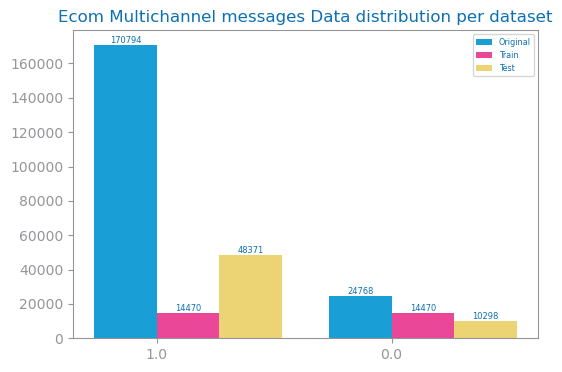

In [5]:
from pandas import concat
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_multibar_chart


# Distribution check


# Create a dictionary to store original class counts
values: dict[str, list[int]] = {
    "Original": [
        len(data[data[target] == 0]),  # Assuming 0 is the negative class
        len(data[data[target] == 1]),  # Assuming 1 is the positive class
    ]
}

values["Train"] = [
    len(train[train[target] == 0]),
    len(train[train[target] == 1]),
]
values["Test"] = [
    len(test[test[target] == 0]),
    len(test[test[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title=f"{file_tag} Data distribution per dataset")
show()

# Model Evaluation

In [6]:
trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train, test, target)
print(f'Train#={len(trnX)} Test#={len(tstX)}')
print(f'Labels={labels}')

Train#=28940 Test#=58669
Labels=[0.0, 1.0]


## recall evaluation

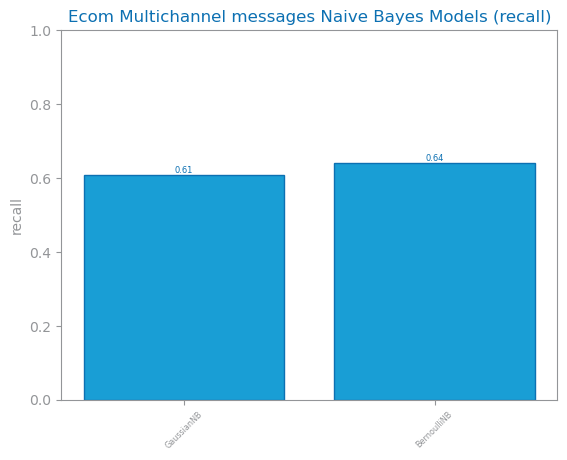

In [7]:
best_model_recall, recall_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='recall',file_tag=file_tag)
savefig(f'images/{file_tag}_dt_recall_study.png')
show()



<Figure size 640x480 with 0 Axes>

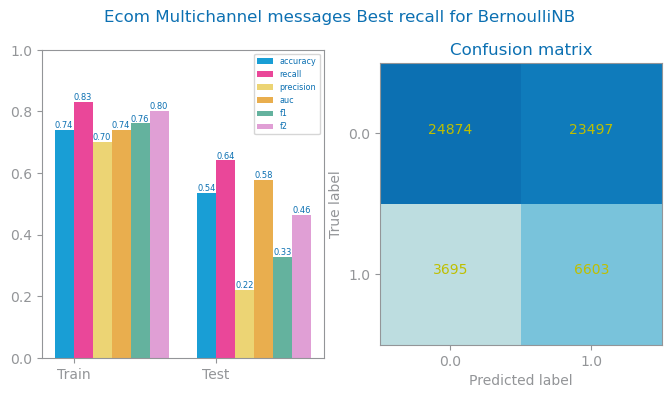

In [8]:
from dslabs_functions import plot_evaluation_results

prd_trn = best_model_recall.predict(trnX)
prd_tst = best_model_recall.predict(tstX)
figure()

plot_evaluation_results(recall_params, trnY, prd_trn, tstY, prd_tst, labels, file_tag=file_tag)
savefig(f'images/{file_tag}_dt_{recall_params["name"]}_best_{recall_params["metric"]}_eval.png')
show()

## precision evaluate 

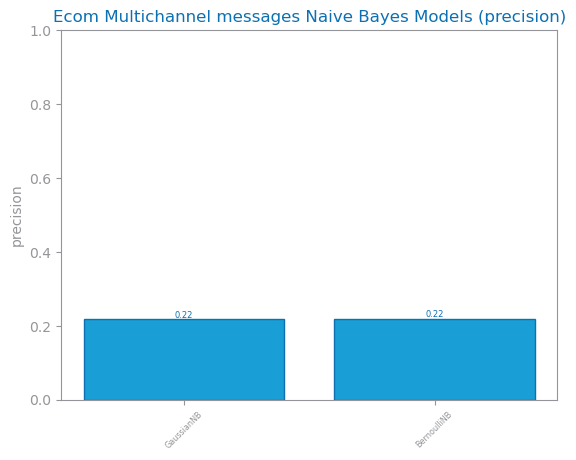

In [9]:
best_model_prec, prec_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='precision',file_tag=file_tag)
savefig(f'images/{file_tag}_dt_precision_study.png')
show()

<Figure size 640x480 with 0 Axes>

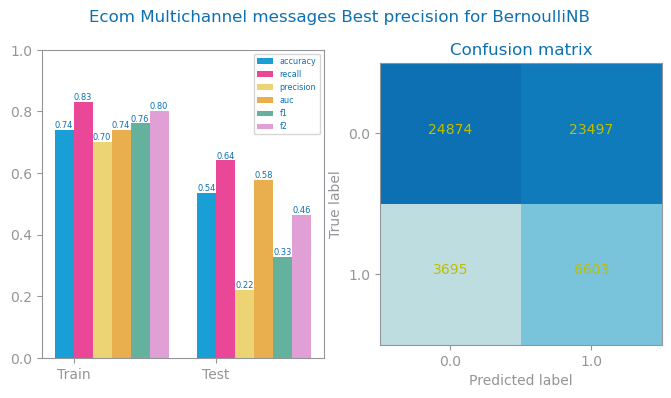

In [10]:
from dslabs_functions import plot_evaluation_results


prd_trn: array = best_model_prec.predict(trnX)
prd_tst: array = best_model_prec.predict(tstX)
figure()
plot_evaluation_results(prec_params, trnY, prd_trn, tstY, prd_tst, labels, file_tag=file_tag)
savefig(f'images/{file_tag}_dt_{prec_params["name"]}_best_{prec_params["metric"]}_eval.png')
show()

## accuracy evaluate 

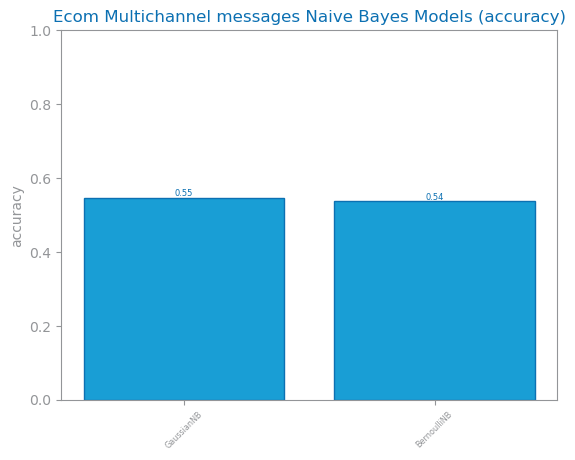

In [11]:
best_model_acc, acc_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='accuracy',file_tag=file_tag)
savefig(f'images/{file_tag}_dt_accuracy_study.png')
show()

<Figure size 640x480 with 0 Axes>

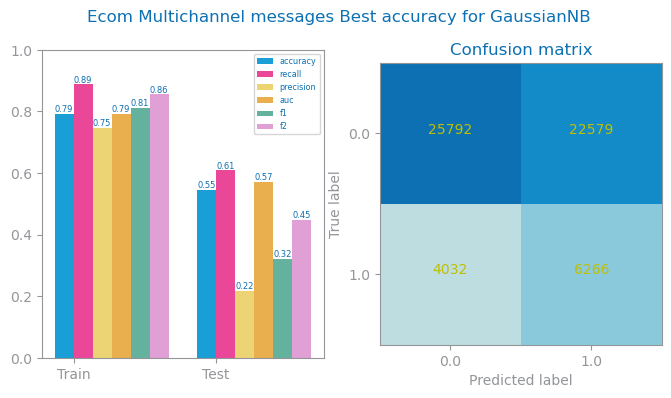

In [12]:
prd_trn: array = best_model_acc.predict(trnX)
prd_tst: array = best_model_acc.predict(tstX)
figure()
plot_evaluation_results(acc_params, trnY, prd_trn, tstY, prd_tst, labels,file_tag=file_tag)
savefig(f'images/{file_tag}_dt_{acc_params["name"]}_best_{acc_params["metric"]}_eval.png')
show()

## evaluate f2

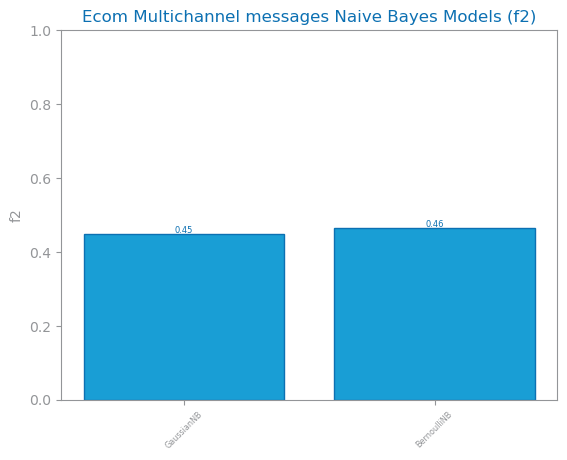

In [13]:
best_model_f2, f2_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='f2',file_tag=file_tag)
savefig(f'images/{file_tag}_dt_accuracy_study.png')
show()

<Figure size 640x480 with 0 Axes>

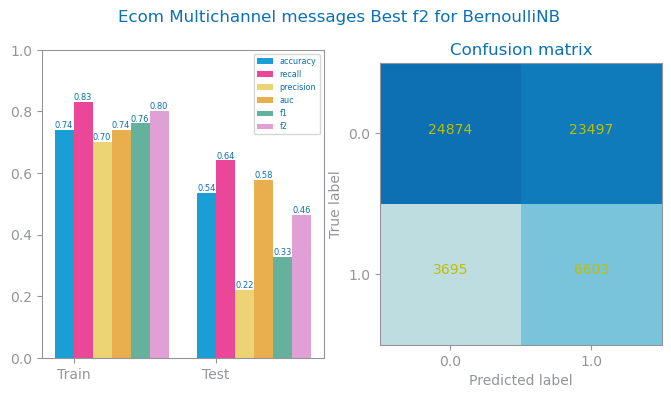

In [14]:
prd_trn: array = best_model_f2.predict(trnX)
prd_tst: array = best_model_f2.predict(tstX)
figure()
plot_evaluation_results(f2_params, trnY, prd_trn, tstY, prd_tst, labels, file_tag=file_tag)
savefig(f'images/{file_tag}_dt_{f2_params["name"]}_best_{f2_params["metric"]}_eval.png')
show()

# Overfitting

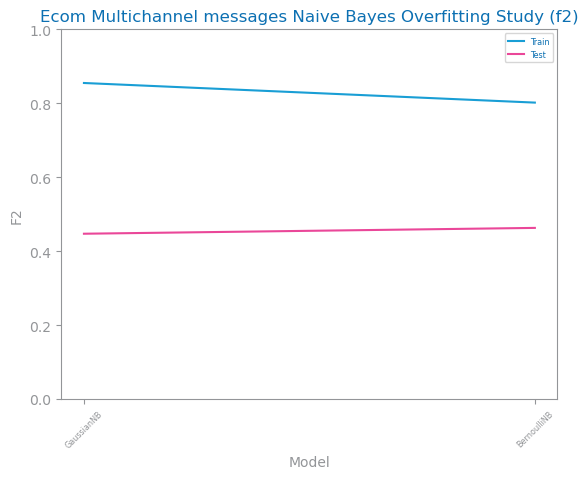

In [15]:
from matplotlib.pyplot import figure, savefig
from sklearn.naive_bayes import GaussianNB, BernoulliNB

# Define Naive Bayes models
nb_models = {
    "GaussianNB": GaussianNB(),
    "BernoulliNB": BernoulliNB(),
}

# Choose your metric name as a string
acc_metric = "f2"  # Or any other metric you want to use

y_tst_values = {}
y_trn_values = {}

# Iterate through each Naive Bayes model and evaluate performance on train and test sets
for name, model in nb_models.items():
    model.fit(trnX, trnY)
    
    # Predictions for train and test sets
    prd_trn_Y = model.predict(trnX)
    prd_tst_Y = model.predict(tstX)
    
    # Dynamically call the selected metric from CLASS_EVAL_METRICS by name
    trn_metric_value = CLASS_EVAL_METRICS[acc_metric](trnY, prd_trn_Y)
    tst_metric_value = CLASS_EVAL_METRICS[acc_metric](tstY, prd_tst_Y)
    
    # Store values for plotting
    y_trn_values[name] = trn_metric_value
    y_tst_values[name] = tst_metric_value

# Plotting overfitting study
figure()
plot_multiline_chart(
    list(nb_models.keys()),  # x-axis labels (model names)
    {"Train": list(y_trn_values.values()), "Test": list(y_tst_values.values())},
    title=f"{file_tag} Naive Bayes Overfitting Study ({acc_metric})",
    xlabel="Model",
    ylabel=acc_metric.capitalize(),  # Use the metric name as the label
    percentage=True,  # Set to False if your metric is not in percentage
)
savefig(f"images/{file_tag}_nb_overfitting_{acc_metric}.png")
show()


# Analysis
- there seems to be higher precision on BernoulliNB although less recall. this seems to offer a more balanced approach to avoid too many false negatives
